# Using wrap method to refine feature selection

###  Read clean data

In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'Group_2_clean_Data..csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

df.head()


,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,149.0,28.0,55.0,509.0,1.0,11980.0,3.10,1.37,91.78,6.50,...,14.1,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,1034.0,35.0,58.0,424.0,1.0,23123.0,2.82,0.80,95.57,3.44,...,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,1780.0,34.0,114.0,959.0,1.0,29344.0,2.43,0.74,94.33,3.43,...,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,664.0,31.0,53.0,213.0,1.0,16656.0,2.40,1.70,97.35,0.50,...,225.0,1301.78,716.0,4142.56,47.0,271.93,5.0,21.08,306.64,4425.45
4,140.0,22.0,82.0,471.0,1.0,11245.0,2.76,0.53,89.16,1.17,...,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,374.06,9988.79


In [2]:
# Assuming `df` is your DataFrame:
df_feature = df.iloc[:, 5:-18]  # Select all rows and columns from index 5 to the 18th-to-last
df_target = df['burglaries']  # Select the 'violentPerPop' column as the target variable


df_feature.head(5)


,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,...,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit
0,11980.0,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,0.1,10.66,53.72,65.29,78.09,89.14,13.7,1845.9,9.63,0.2
1,23123.0,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,0.0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0
2,29344.0,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,0.0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0
3,16656.0,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,0.0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0
4,11245.0,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,0.0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

n_top_features = 30

X_train, X_test, y_train, y_test = train_test_split(
    df_feature, df_target, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

top_features = feature_importances.head(n_top_features)['Feature'].tolist()
print(f"Top {n_top_features} Features: {top_features}")

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

rf_model_top = RandomForestRegressor(random_state=42, n_estimators=50)
rf_model_top.fit(X_train_top, y_train)

y_pred_top = rf_model_top.predict(X_test_top)
test_mse_top = mean_squared_error(y_test, y_pred_top)
test_r2_top = r2_score(y_test, y_pred_top)

y_train_pred_top = rf_model_top.predict(X_train_top)
train_mse_top = mean_squared_error(y_train, y_train_pred_top)
train_r2_top = r2_score(y_train, y_train_pred_top)

print(f"Training Set Metrics with Top {n_top_features} Features:")
print(f"  - Mean Squared Error: {train_mse_top:.2f}")
print(f"  - R-squared: {train_r2_top:.2f}")

print(f"Testing Set Metrics with Top {n_top_features} Features:")
print(f"  - Mean Squared Error: {test_mse_top:.2f}")
print(f"  - R-squared: {test_r2_top:.2f}")


Top 30 Features: ['persPoverty', 'persUrban', 'numForeignBorn', 'kidsBornNevrMarr', 'pop', 'houseVacant', 'persEmergShelt', 'pctUsePubTrans', 'persHomeless', 'pctLargHous', 'pctPersOwnOccup', 'landArea', 'pctImmig-5', 'pctFemDivorc', 'pctWorkMom-6', 'pctSmallHousUnits', 'pctSameCounty-5', 'pctHousOwnerOccup', 'pctMaleNevMar', 'NAperCap', 'pctSameHouse-5', 'persPerOccupHous', 'pctFgnImmig-3', 'pctMaleDivorc', 'pctOccupMgmt', 'medRentpctHousInc', 'whitePerCap', 'pctEmployMfg', 'pctLowEdu', 'pct16-24']
Training Set Metrics with Top 30 Features:
  - Mean Squared Error: 530342.80
  - R-squared: 0.95
Testing Set Metrics with Top 30 Features:
  - Mean Squared Error: 190513.61
  - R-squared: 0.93


# Experimenting with RFE

Refined Features: ['persPoverty', 'persUrban', 'numForeignBorn', 'kidsBornNevrMarr', 'pop', 'houseVacant', 'persEmergShelt', 'persHomeless', 'pctLargHous', 'NAperCap']
Final Model Performance with Refined Features:
  - Mean Squared Error: 247211.18
  - R-squared: 0.91


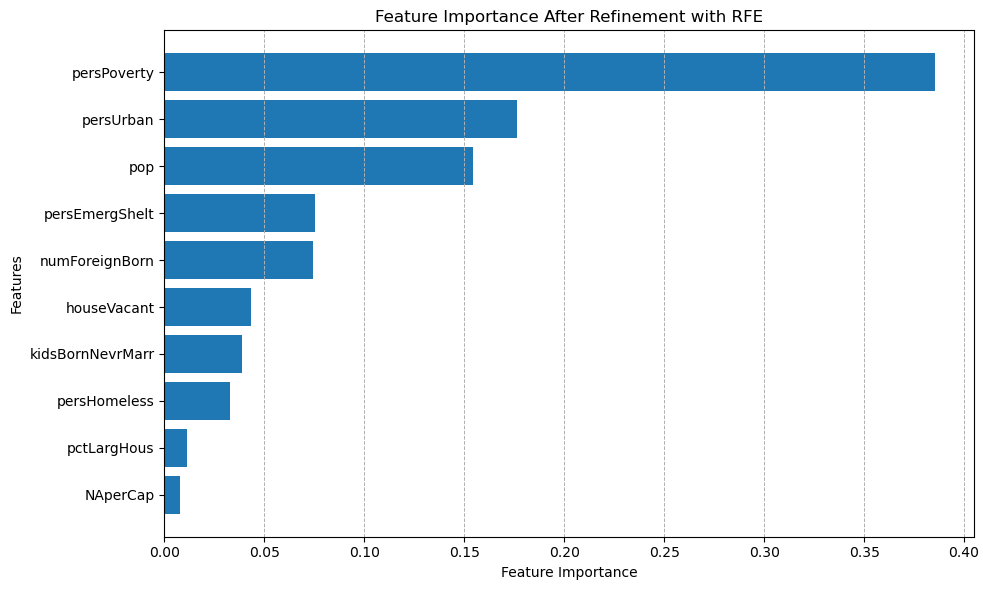

In [4]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=50)

# Recursive Feature Elimination (RFE) for feature refinement
rfe = RFE(estimator=rf, n_features_to_select=10)  # Set the desired number of features
rfe.fit(X_train[top_features], y_train)

# Get the refined features
refined_features = X_train[top_features].columns[rfe.support_]
print(f"Refined Features: {list(refined_features)}")

# Train and evaluate the final model with refined features
X_train_refined = X_train[refined_features]
X_test_refined = X_test[refined_features]
rf.fit(X_train_refined, y_train)

# Predictions and metrics
y_pred = rf.predict(X_test_refined)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Final Model Performance with Refined Features:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")

# Rank features by importance
sorted_indices = rf.feature_importances_.argsort()[::-1]
sorted_features = [refined_features[i] for i in sorted_indices]
sorted_importances = rf.feature_importances_[sorted_indices]

# Plot feature importances for refined features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance After Refinement with RFE")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.grid(axis="x", linestyle="--", linewidth=0.7)
plt.tight_layout()
plt.savefig("feature_importance_rfe.png", format="png", dpi=300)
plt.show()


#  experimenting  model with SFS method

Refined Features: ['persPoverty', 'persUrban', 'numForeignBorn', 'kidsBornNevrMarr', 'pop', 'houseVacant', 'pctImmig-5', 'pctSmallHousUnits', 'pctSameCounty-5', 'pctHousOwnerOccup', 'persPerOccupHous', 'pctFgnImmig-3', 'pctOccupMgmt', 'whitePerCap', 'pctLowEdu']
Final Model Performance with Refined Features:
  - Mean Squared Error: 273425.36
  - R-squared: 0.90


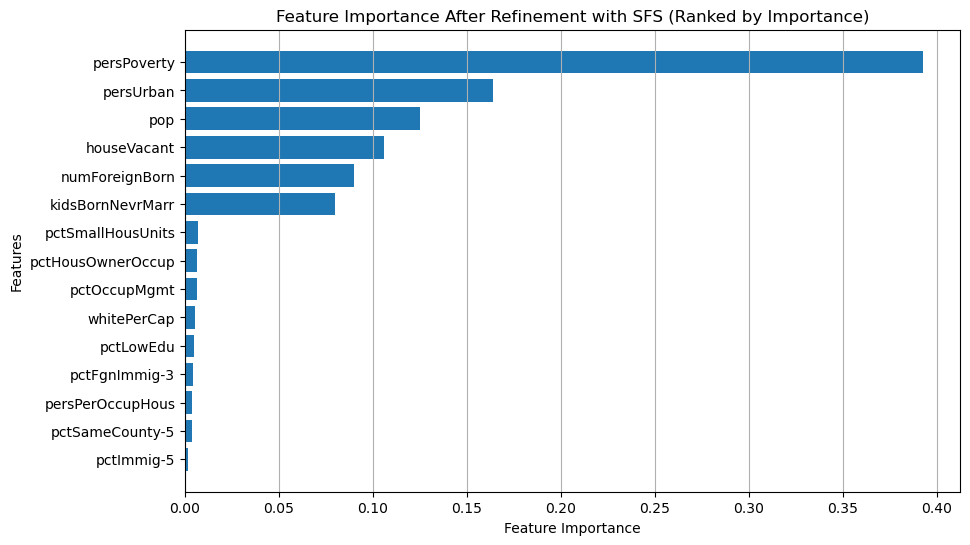

In [5]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=50)

# Sequential Feature Selector for forward selection refinement
sfs = SequentialFeatureSelector(
    estimator=rf,
    n_features_to_select="auto",  # Automatically determine the optimal subset
    direction="forward",  # Forward selection
    scoring="r2",  # Use R-squared for performance evaluation
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

# Fit SFS on the top 30 features
sfs.fit(X_train[top_features], y_train)

# Get the refined features
refined_features = X_train[top_features].columns[sfs.get_support()]
print(f"Refined Features: {list(refined_features)}")

# Train and evaluate the final model with refined features
X_train_refined = X_train[refined_features]
X_test_refined = X_test[refined_features]
rf.fit(X_train_refined, y_train)

# Predictions and metrics
y_pred = rf.predict(X_test_refined)
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"Final Model Performance with Refined Features:")
print(f"  - Mean Squared Error: {test_mse:.2f}")
print(f"  - R-squared: {test_r2:.2f}")
# Plot feature importances for refined features sorted by importance
sorted_indices = rf.feature_importances_.argsort()[::-1]  # Sort indices in descending order of importance
sorted_features = [refined_features[i] for i in sorted_indices]  # Sort feature names
sorted_importances = rf.feature_importances_[sorted_indices]  # Sort importances

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance After Refinement with SFS (Ranked by Importance)")
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.grid(axis="x")
plt.savefig("feature_importance_SFS.png", format="png", dpi=300)
plt.show()

